In [114]:
import os,warnings;warnings.filterwarnings("ignore")
import numpy as np;import pandas as pd;import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid',font_scale=0.8)
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import sklearn.model_selection as ms
import sklearn.neighbors as ne 
import pandas as pd

In [115]:
df=pd.read_csv("/Users/rajsekhar/Downloads/heart_cleveland_upload.csv")
print(df.head())
print(df.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
(297, 14)


In [116]:
#Checking for not nulls
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [117]:
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [118]:
df['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

In [119]:
X=df.iloc[:,:13]
y=df['condition']

In [120]:
scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(X)
X.loc[:,:]=scaled_values

In [121]:
#set seed for reproducibility
SEED=

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Decision Tree', dt)]

|--- feature_12 <= 0.25
|   |--- feature_7 <= 0.44
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1
|   |--- feature_7 >  0.44
|   |   |--- feature_0 <= 0.55
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.55
|   |   |   |--- class: 0
|--- feature_12 >  0.25
|   |--- feature_3 <= 0.14
|   |   |--- class: 0
|   |--- feature_3 >  0.14
|   |   |--- feature_11 <= 0.17
|   |   |   |--- class: 1
|   |   |--- feature_11 >  0.17
|   |   |   |--- class: 1



[Text(0.5416666666666666, 0.875, 'x[12] <= 0.25\ngini = 0.497\nsamples = 207\nvalue = [112, 95]'),
 Text(0.3333333333333333, 0.625, 'x[7] <= 0.439\ngini = 0.351\nsamples = 119\nvalue = [92, 27]'),
 Text(0.16666666666666666, 0.375, 'x[1] <= 0.5\ngini = 0.465\nsamples = 19\nvalue = [7, 12]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.25, 0.125, 'gini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.5, 0.375, 'x[0] <= 0.552\ngini = 0.255\nsamples = 100\nvalue = [85, 15]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.117\nsamples = 64\nvalue = [60, 4]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.424\nsamples = 36\nvalue = [25, 11]'),
 Text(0.75, 0.625, 'x[3] <= 0.142\ngini = 0.351\nsamples = 88\nvalue = [20, 68]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.8333333333333334, 0.375, 'x[11] <= 0.167\ngini = 0.296\nsamples = 83\nvalue = [15, 68]'),
 Text(0.75, 0.125, 'gini = 0.461\nsamples = 36\nvalue = [

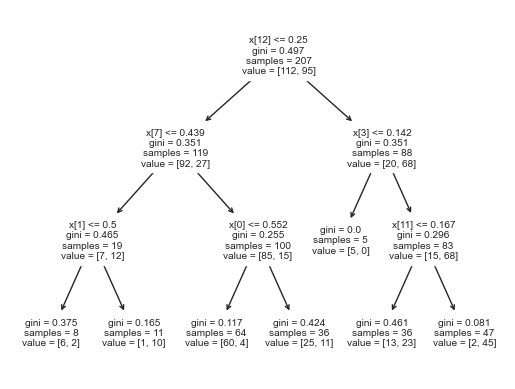

In [123]:
# Decision tree
#Create a Decision Tree classifier with the current max_depth
from sklearn import tree
import sklearn.tree as tr
DT=tr.DecisionTreeClassifier(max_depth=3)
DT.fit(X_train,y_train)
trACC=DT.score(X_train,y_train)
tesACC=DT.score(X_test,y_test)

#print(trACC)
#print(tesACC)
model = DT.fit(X_train, y_train)
text_representation = tr.export_text(DT)
print(text_representation)

# To Visualize Decision Tree
tree.plot_tree(model)

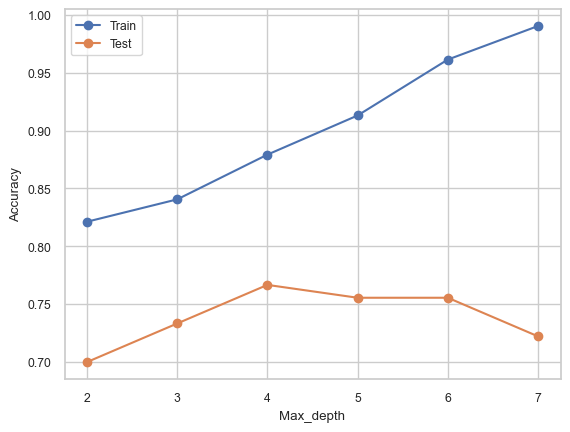

In [124]:
# Decision tree
trACC=[]
tesACC=[]
MD=[]

for i in range(2,8):
    #Create a Decision Tree classifier with the current max_depth
    DT=tr.DecisionTreeClassifier(max_depth=i)
    DT.fit(X_train,y_train)
    trACC.append(DT.score(X_train,y_train))
    tesACC.append(DT.score(X_test,y_test))
    MD.append(i)
#print(trACC)
#print(tesACC)
#print(MD)
plt.figure()
plt.plot(MD, trACC, label='Train',marker='o')
plt.plot(MD, tesACC, label='Test', marker='o')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#print(trACC)
#print(tesACC)

In [125]:
best_score = 0.0
best_k = 0
for k in range(1, 25):
    knn_clf_sk = KNN(n_neighbors=k)
    knn_clf_sk.fit(X_train, y_train)
    score = knn_clf_sk.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
 
print("best_k = " + str(best_k))
print("best_score = " + str(best_score))

best_k = 14
best_score = 0.8


[0.7666666666666667, 0.7666666666666667, 0.7777777777777778, 0.7333333333333333, 0.7555555555555555, 0.7666666666666667, 0.7888888888888889, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7888888888888889, 0.7777777777777778, 0.7888888888888889, 0.8, 0.7888888888888889, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7888888888888889, 0.7888888888888889, 0.8, 0.8, 0.8, 0.8]
[0.7666666666666667, 0.7666666666666667, 0.7777777777777778, 0.7333333333333333, 0.7555555555555555, 0.7666666666666667, 0.7888888888888889, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7888888888888889, 0.7777777777777778, 0.7888888888888889, 0.8, 0.7888888888888889, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7888888888888889, 0.7888888888888889, 0.8, 0.8, 0.8, 0.8]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


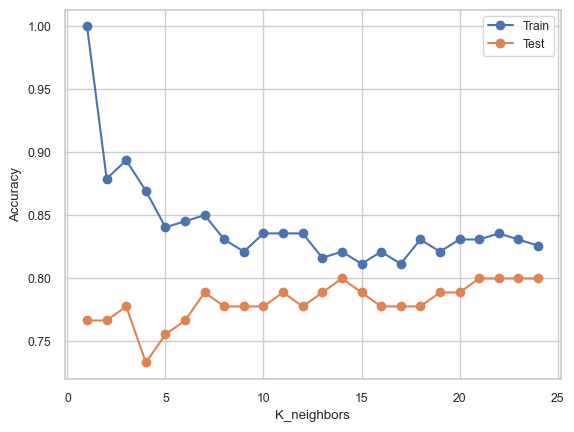

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have your data in X_train, X_test, y_train, y_test
test_score=[]
train_score=[]
MD=[]
for i in range(1,25):
    knn=KNN(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    train_score.append(accuracy_score(y_train, y_pred_train))
    test_score.append(accuracy_score(y_test, y_pred_test))
    MD.append(i)
print(test_score)
print(test_score)
print(MD)  
# Visulaize ACC
plt.figure()
plt.plot(MD, train_score, label='Train',marker='o')
plt.plot(MD, test_score, label='Test',marker='o')
plt.xlabel('K_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [134]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix
 
# Create the logistic regression model
model = LogisticRegression()
 
# Train the model
model.fit(X_train, y_train)
 
# Evaluate the model
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


# Make predictions
y_pred = model.predict(X)

print("\nConfusion Matrix:")
confusion_matrix=confusion_matrix(y, y_pred)
print(confusion_matrix)

Train Accuracy: 0.855072463768116
Test Accuracy: 0.8111111111111111

Confusion Matrix:
[[137  23]
 [ 24 113]]


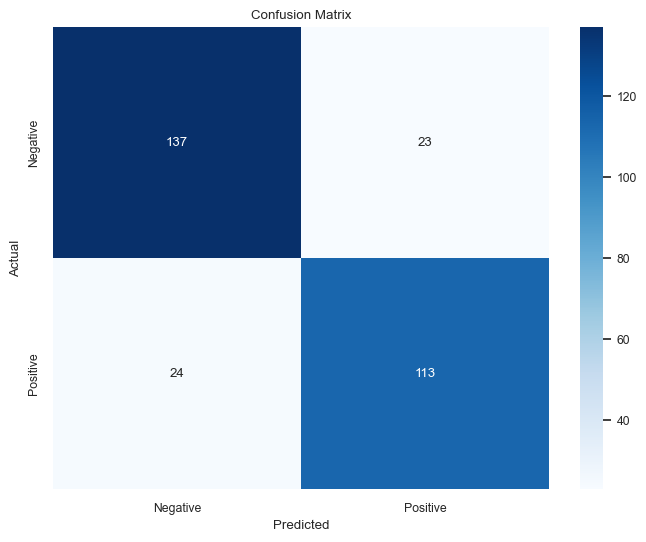

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix
confusion_matrix=confusion_matrix(y, y_pred)

# Define the labels for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=SEED)
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:
    # Fit clf to the training set
    clf.fit(X_train, y_train)
    # Predict y_pred
    y_pred = clf.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.811
K Nearest Neighbours : 0.789
Decision Tree : 0.733
